#############################################

ЧАСТЬ 1 (импорт библиотек)

In [2]:
#импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from scipy import stats
import requests
from urllib.parse import urlencode
import warnings
import string
import names
from IPython.display import Image
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

#############################################

ЧАСТЬ 2 (подготовка датасетов)

In [3]:
#загружаю датасет
customers = pd.read_csv('C:\\temp\\firstproject\\olist_customers_dataset.csv')

In [4]:
#проверяю корректность загрузки данных и их отображение/структуру
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#проверяю формат данных в датасете
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
#проверяю пропущенные значения в датасете - отсутствуют
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
#загружаю второй датасет, поскольку чтение типов данных далее показало, что даты нераспарсены, 
#передаю соответствующую команду на данные колонки
orders = pd.read_csv('C:\\temp\\firstproject\\olist_orders_dataset.csv', parse_dates=[3,4,5,6,7])

In [8]:
#проверяю корректность загрузки данных и их отображение/структуру
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
#проверяю формат данных в датасете, при первой проверке все даты были распознаны, как текст, 
#соответственно применена выше команда 'parse_dates' к нужным столбцам
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [10]:
#проверяю пропущенные значения в датасете - таковые имеются
#однако нет основания считать данные пропуски аномалиями: все они относятся к датам на определенных этапах заказа,
#буду считать, что пропуски означают то, что соответствующий этап еще не наступил
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
#загружаю третий датасет
items = pd.read_csv('C:\\temp\\firstproject\\olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [12]:
#проверяю корректность загрузки данных и их отображение/структуру
items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
#проверяю отсутствие нулевых и отрицательных значений по товарам в заказах - отсутствуют
items['order_item_id'].sort_values()

0         1
72706     1
72705     1
72704     1
72703     1
         ..
11950    19
11951    20
75122    20
57316    20
57317    21
Name: order_item_id, Length: 112650, dtype: int64

In [14]:
#проверяю отсутствие нулевых и отрицательных значений по цене товара - отсутствует
items['price'].sort_values()

27652        0.85
87081        0.85
48625        0.85
57297        1.20
57302        1.20
           ...   
11249     4690.00
74336     4799.00
107841    6499.00
112233    6729.00
3556      6735.00
Name: price, Length: 112650, dtype: float64

In [15]:
#проверяю отсутствие нулевых и отрицательных значений по весу товара - имеются товары с нулевым весом
items['freight_value'].sort_values()

81475      0.00
47406      0.00
51117      0.00
15225      0.00
94446      0.00
          ...  
16731    338.30
69797    339.59
28044    375.28
3303     375.28
73486    409.68
Name: freight_value, Length: 112650, dtype: float64

In [16]:
#проверяю количество нулевых значений по весу товара - имеются товары с нулевым весом
items.query("freight_value == 0").value_counts('freight_value')

freight_value
0.0    383
dtype: int64

In [17]:
#объединяю датасеты для того чтобы посмотреть в каких статусах присутствуют товары с нулевым весом
all_orders = pd.merge(orders, items, how='left', on='order_id')

In [18]:
#поскольку нулевой вес присутствует только в заказах либо доставленных, либо уже отгруженных -
#это явно ошибка данных, требующая корректировки
all_orders.query("freight_value == 0").value_counts('order_status')

order_status
delivered    381
shipped        2
dtype: int64

In [19]:
#проверяю формат данных в датасете
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [20]:
#проверяю пропущенные значения в датасете - отсутствуют
items.isnull().values.ravel().sum()

0

#############################################

ЧАСТЬ 3 (Решаю вопрос №1)

Сколько у нас пользователей, которые совершили покупку только один раз?

In [21]:
#смотрю какие вообще у нас есть статусы заказов и каковы их численные показатели
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Под совершенную покупку попадают все статусы кроме 'canceled' (заказ отменен - тут очевидно), а также 'unavailable' (нет товара в наличии - сделка не состоялась). 

Вторым важным признаком будет факт оплаты, мы не можем считать покупку совершенной, если не было факта оплаты заказа. Под оплатой считаем наличие данных по столбцу "order_approved_at'.

In [22]:
orders['paid'] = orders.order_approved_at.notna()

In [23]:
#фильтрую заказы по статусам, а также оставляю только оплаченные заказы
true_orders = orders.query("(order_status != 'unavailable') and \
                     (order_status != 'canceled') and \
                     (paid == True)")

In [24]:
#проверяю количество полученных заказов после фильтрации
true_orders.order_status.value_counts()

delivered     96464
shipped        1107
invoiced        314
processing      301
approved          2
Name: order_status, dtype: int64

In [25]:
#объединяю датасеты для того чтобы определить количество клиентов с одним заказом
true_orders_CUid = pd.merge(true_orders, customers, how='left', on='customer_id')

In [26]:
#проверяю визуально результат объединения
true_orders_CUid.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paid,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


In [27]:
#делаю группировку и отбор уникальных клиентов только с одним заказом, выводим результат
only_one_buy = true_orders_CUid.groupby('customer_unique_id', as_index=False) \
                                        .agg({'customer_id': 'count'}) \
                                        .rename(columns={'customer_id': 'buy_counter'}) \
                                        .query('buy_counter == 1')
only_one_buy.shape[0]

92087

Количество клиентов с одним заказом - 92087.

ЧАСТЬ 4 (Решаю вопрос №2) 

Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

##############################################################################

In [28]:
#смотрю еще раз какие вообще у нас есть статусы заказов
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [29]:
#создаю новый столбец с булевым значением - для проверки доставлен ли заказ покупателю
#и сразу проверю были ли отмененные заказы доставлены - да их было 6 штук
orders['delivered'] = orders.order_delivered_customer_date.notna()
orders.query("(order_status == 'canceled') and \
                     (delivered == True)").delivered.value_counts()

True    6
Name: delivered, dtype: int64

In [30]:
#проверю имеют ли заказы статус доставлен, но при этом отсутствует дата доставки - да, таких было 8
#здесь явная аномалия, однако нет повода считать заказ недоставленным, видимо здесь ошибка в данных и нужна корректировка
orders.query("(order_status == 'delivered') and \
                     (delivered == False)").delivered.value_counts()

False    8
Name: delivered, dtype: int64

In [31]:
#проверю были ли недоступные заказы доставлены - нет, таковых не было
orders.query("(order_status == 'unavailable') and \
                     (delivered == True)").delivered.value_counts()

Series([], Name: delivered, dtype: int64)

In [32]:
#пользуясь случаем проверю, были ли доставленные товары, которые не были оплачены клиентами - да их было 14
orders.query("(order_status == 'delivered') and \
                     (delivered == True) and \
                     (paid == False)").delivered.value_counts()

True    14
Name: delivered, dtype: int64

In [33]:
#а теперь посмотрю сколько товаров доставлено за пределами срока предполагаемой доставки:
#то есть "order_estimated_delivery_date" меньше чем "order_delivered_customer_date"
#оказывается у нас проблемы - около 8 тысяч заказов доставлены не вовремя
orders.query("(order_status == 'delivered') and \
                     (delivered == True) and \
             (order_estimated_delivery_date < order_delivered_customer_date)").delivered.value_counts()

True    7826
Name: delivered, dtype: int64

Исходя из изложенного выше следует, что под категорию недоставленных заказов я буду отбирать следующие категории:
 1. Заказ отменен (order_status == 'canceled'), за исключением тех 6 случаев, когда товар уже был доставлен на момент отмены - это не наша вина и данные заказы не нужно учитывать;
 2. Нет товара в наличии - сделка не состоялась (order_status == 'unavailable').

In [34]:
#готовлю датасеты с заказами, которые имеют указанные выше статусы
undelivered = orders.query("(order_status == 'unavailable') or \
                    (order_status == 'canceled') and \
                    (delivered == False)")
undelivered_status = undelivered.groupby('order_status') \
                .agg({'order_id' : 'count'}) \
                .rename(columns={'order_id' : 'count'}) \
                .reset_index()

In [35]:
#смотрю сколько у нас всего недоставленных заказов в шт. с разбивкой по их статусам
undelivered_status

,order_status,count
0,canceled,619
1,unavailable,609


In [36]:
#записываю числовые данные строк в переменные для последующих расчетов
canceled_count = undelivered_status['count'].loc[undelivered_status.index[0]]
unavailable_count = undelivered_status['count'].loc[undelivered_status.index[1]]

In [37]:
#определять среднее по отсутствию доставки будем по столбцу 'estimated_delivery_date',
#кстати, проверка в самом начале показала, что в нем нет пропущенных значений,
#также перевел формат столбца обещанной даты доставки к фортмату "год/месяц" в новый столбец
undelivered['estimated_delivery'] = undelivered.order_estimated_delivery_date.apply(lambda x: x.strftime('%Y-%m'))

In [38]:
#группирую подготовленные данные и вывожу для ознакомления.
#нетрудно заметить, что у нас есть месяцы в которых не было недоставленных заказов (например в январе 2017г.),
#а значит для корректного расчета среднего по месяцам нужно учесть, что в данные месяцы было 0 соответствующих наблюдений
undelivered_per_month = undelivered.query("order_status in ('canceled', 'unavailable')") \
            .groupby(['estimated_delivery', 'order_status']) \
            .agg({'order_id': 'count'}).reset_index() \
            .rename(columns={'order_id': 'order_amount'})
undelivered_per_month.head(10)

,estimated_delivery,order_status,order_amount
0,2016-09,canceled,1
1,2016-10,canceled,3
2,2016-11,canceled,10
3,2016-11,unavailable,5
4,2016-12,canceled,7
5,2016-12,unavailable,2
6,2017-02,canceled,2
7,2017-02,unavailable,2
8,2017-03,canceled,26
9,2017-03,unavailable,66


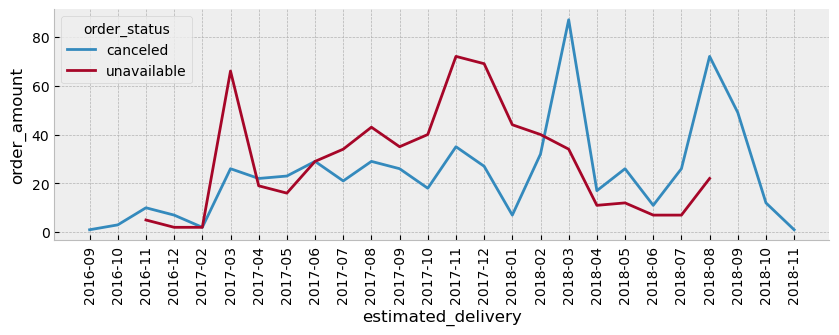

In [39]:
#для наглядности рисую график с разбивкой по причинам
plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sns.lineplot(x='estimated_delivery', y='order_amount', hue='order_status', data=undelivered_per_month)
sns.despine()

In [40]:
#сделаю еще одну группировку на этот раз одновременно для всех причин, посмотрим на общее число
undelivered_per_month2 = undelivered.query("order_status in ('canceled', 'unavailable')") \
            .groupby(['estimated_delivery']) \
            .agg({'order_id': 'count'}).reset_index() \
            .rename(columns={'order_id': 'order_amount'})

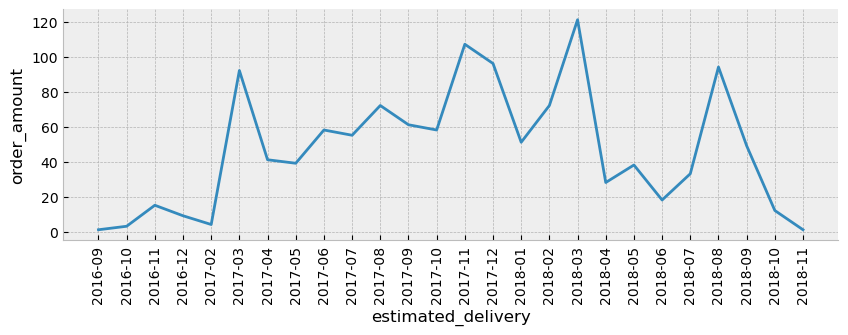

In [41]:
#для наглядности рисую график без разбивки по причинам
plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sns.lineplot(x='estimated_delivery', y='order_amount', data=undelivered_per_month2)
sns.despine()

In [42]:
#определю весь период наблюдений (первый и последний месяцы)
orders.order_estimated_delivery_date.sort_values()

10071   2016-09-30
30710   2016-10-04
4541    2016-10-20
53688   2016-10-24
83078   2016-10-25
           ...    
65880   2018-10-23
37003   2018-10-25
82521   2018-10-25
60938   2018-10-30
68373   2018-11-12
Name: order_estimated_delivery_date, Length: 99441, dtype: datetime64[ns]

In [43]:
#определю и запишу в переменную количество месяцев за которые велись наблюдения для расчета среднего - таких 27
date1 = "2016-09" #месяц первого наблюдения
date2 = "2018-11" #месяц последнего наблюдения
month_list = [i.strftime("%b-%y") for i in pd.date_range(start=date1, end=date2, freq='MS')]
period = len(month_list)
period

27

In [44]:
#расчитываю среднее количество в месяц недоставленных товаров по причине отмены заказа (canceled)
(canceled_count / period).round(2)

22.93

In [45]:
#расчитываю среднее количество в месяц недоставленных товаров по причине отсутствия товара (unavailable)
(unavailable_count / period).round(2)

22.56

In [46]:
#расчитываю среднее количество в месяц недоставленных товаров одновременно по обеим причинам (unavailable & canceled)
((unavailable_count + canceled_count) / period).round(2)

45.48

##############################################################################

ЧАСТЬ 5 (Решаю вопрос №3) 

По каждому товару определить, в какой день недели товар чаще всего покупается. 

При решении данного вопроса принимаю следующее допущение.

Под покупкой понимается тоже самое, что и в первом вопросе, поэтому при решении вопроса беру уже ранее созданный мной датасет (true_orders). А день недели покупки определю по дате оплаты заказа (order_approved_at).

In [47]:
#создам в ранее объединенных датасетах 'orders' и 'items' новую колонку в которой будет день недели
true_orders['days'] = true_orders['order_approved_at'].dt.day_name()

In [48]:
#объединю датасеты для последующего анализа - нужен столбец 'product_id' из датасета 'items'
true_orders_merge = true_orders.merge(items, how='left', on='order_id')

In [49]:
#для целей последующего контроля выведу общее количество уникальных товаров, для которых будем считать метрику
true_orders_merge.product_id.nunique()

32726

In [50]:
#день недели, когда товар чаще всего покупается это день, который встречается чаще всего - мода,
#также примечательно, что число уникальных товаров осталось неизменным - 32726,
#получившийся ответ записываю в переменную 'items_top_days'
items_top_days = true_orders_merge.groupby('product_id', as_index=False) \
                                        .agg({'days': pd.Series.mode})
items_top_days

,product_id,days
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32721,fff6177642830a9a94a0f2cba5e476d1,"[Monday, Saturday]"
32722,fff81cc3158d2725c0655ab9ba0f712c,Monday
32723,fff9553ac224cec9d15d49f5a263411f,Saturday
32724,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


##############################################################################

ЧАСТЬ 6 (Решаю вопрос №4) 

Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

При решении данного вопроса, придерживаюсь ранее принятой парадигмы, что считать покупкой (датасет 'true_orders'). Дату покупки также отслеживаю по столбцу 'order_approved_at'. 

In [51]:
#готовлю промежуточный датасет, на этот раз объединяю 'customers' c 'orders' (отфильтрованным ранее),
#после чего оставляю только нужные для работы стообцы, сразу проверяю результат
weekly_orders = true_orders.merge(customers, how='left', on='customer_id') \
                [['customer_unique_id', 'order_id', 'order_approved_at']]
weekly_orders.head()

,customer_unique_id,order_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29


In [52]:
#провожу нужную для работы группировку, также с проверкой результата - в итоге получаем заказы уникальных пользователей в месяц
weekly_orders = weekly_orders.groupby(['order_approved_at', 'customer_unique_id'], as_index=False) \
                          .agg({'order_id': 'count'}) \
                          .rename(columns={'order_id': 'orders_in_month'})
weekly_orders.head()

,order_approved_at,customer_unique_id,orders_in_month
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1
1,2016-10-04 09:43:32,14359ea0c7a105749c0a56478825b015,1
2,2016-10-04 10:19:23,87776adb449c551e74c13fc34f036105,1
3,2016-10-04 10:25:46,88bc832f104b6dd684a17dbb1b76e778,1
4,2016-10-04 10:28:07,8d3a54507421dbd2ce0a1d58046826e0,1


In [53]:
#получаю число недель из месяцев и добавляю их к датасету новым столбцом,
#а также добавлю название месяца в котором была покупка,
#также смотрю  итоговый результат
weekly_orders['weeks_count'] = (weekly_orders['order_approved_at'].dt.daysinmonth) / 7
weekly_orders['month'] = weekly_orders.order_approved_at.dt.month_name()
weekly_orders.head()

,order_approved_at,customer_unique_id,orders_in_month,weeks_count,month
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.285714,September
1,2016-10-04 09:43:32,14359ea0c7a105749c0a56478825b015,1,4.428571,October
2,2016-10-04 10:19:23,87776adb449c551e74c13fc34f036105,1,4.428571,October
3,2016-10-04 10:25:46,88bc832f104b6dd684a17dbb1b76e778,1,4.428571,October
4,2016-10-04 10:28:07,8d3a54507421dbd2ce0a1d58046826e0,1,4.428571,October


In [54]:
#готовлю последние преобразования в датасете - делю количество заказов уникальных клиентов на количество недель в месяце,
#чтобы получить ответ на вопрос, 
#итоговый результат запишу в переменную 'orders_per_week', в котором будут только нужные столбцы
weekly_orders['avg_orders_per_week'] = weekly_orders.orders_in_month / weekly_orders.weeks_count
avg_orders_per_week = weekly_orders[['customer_unique_id', 'orders_in_month', 'month', 'avg_orders_per_week']]
avg_orders_per_week

,customer_unique_id,orders_in_month,month,avg_orders_per_week
0,830d5b7aaa3b6f1e9ad63703bec97d23,1,September,0.233333
1,14359ea0c7a105749c0a56478825b015,1,October,0.225806
2,87776adb449c551e74c13fc34f036105,1,October,0.225806
3,88bc832f104b6dd684a17dbb1b76e778,1,October,0.225806
4,8d3a54507421dbd2ce0a1d58046826e0,1,October,0.225806
...,...,...,...,...
98099,7febafa06d9d8f232a900a2937f04338,1,August,0.225806
98100,5c58de6fb80e93396e2f35642666b693,1,August,0.225806
98101,b701bebbdf478f5500348f03aff62121,1,August,0.225806
98102,24ac2b4327e25baf39f2119e4228976a,1,August,0.225806


##############################################################################

ЧАСТЬ 7 (Решаю вопрос №5) 

Используя pandas, проведи когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

При решении вопроса №2 мной было установлено, что у нас наблюдения имеются за период с сентября 2016г. по ноябрь 2018г.

Значит когортный анализ, судя по поставленному вопросу, можно провести только за 2017г.

Критерии когортного анализа:

1. Когорта пользователей -  делю покупателей по месяцу покупки. Под покупкой привычно использую данные по столбцу 'order_approved_at';

2. Интервал времени по метрике - месяц;

3. Метрика -  retention: количество пользователей, которые вернулись к нашим товарам через месяц после первой покупки.

Строю когортный анализ по инструкции, расположенной по ссылке: https://medium.com/@adrianovalexey/раз-и-навсегда-как-автоматизировать-построение-когорт-с-python-и-pandas-74f2c38dd3f7

In [55]:
#еще раз объеденю датасеты знакомым образом (как в прошлом вопросе)
cohorts_orders = true_orders.merge(customers, how='left', on='customer_id')

In [56]:
#оставлю только нужные для анализа колонки
cohorts_orders = cohorts_orders.loc[:, ['customer_unique_id', 'order_approved_at']]

In [57]:
#добавлю столбец с периодом заказа в формате год/месяц
cohorts_orders['orders_period'] = cohorts_orders.order_approved_at.apply(lambda x: x.strftime('%Y-%m'))

In [58]:
#отфильтрую датасет по периоду в задании - 2017г., проверю результат
cohorts_orders = cohorts_orders.query('order_approved_at >= "2017-01-01" & order_approved_at <= "2017-12-31"')
cohorts_orders.head(5)

,customer_unique_id,order_approved_at,orders_period
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 22:10:13,2017-07
6,36edbb3fb164b1f16485364b6fb04c73,2017-04-13 13:25:17,2017-04
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:22:11,2017-05


In [59]:
#группирую по первой покупке клиента, добавлю столбец первой покупки,
#создаю столбец в котором далее будет количество заказов
#проверяю получившийся результат
cohorts_orders.set_index('customer_unique_id', inplace=True)
cohorts_orders['first_month'] = cohorts_orders.groupby(level=0)['order_approved_at'].min().apply(lambda x: x.strftime('%Y-%m'))
cohorts_orders.reset_index(inplace=True)
cohorts_orders.insert(len(cohorts_orders.columns), 'orders_amount', 0, allow_duplicates=False) #
cohorts_orders.head(5)

,customer_unique_id,order_approved_at,orders_period,first_month,orders_amount
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10,2017-09,0
1,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11,2017-11,0
2,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 22:10:13,2017-07,2017-07,0
3,36edbb3fb164b1f16485364b6fb04c73,2017-04-13 13:25:17,2017-04,2017-04,0
4,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:22:11,2017-05,2017-05,0


In [60]:
#объединю группы,
#определю количество покупок по количеству элементов в одном периоде и количество уникальных клиентов
#переименую столбцы для лучшего восприятия
grouped_cohorts_orders = cohorts_orders.groupby(['first_month', 'orders_period'])
cohorts = grouped_cohorts_orders.agg({'customer_unique_id': pd.Series.nunique, 'orders_amount': pd.Series.count})
cohorts.rename(columns={'customer_unique_id': 'all_customers'}, inplace=True)
cohorts.head(5)

all_customers  orders_amount
first_month orders_period                              
2017-01     2017-01                  717            750
            2017-02                    4              4
            2017-03                    2              2
            2017-04                    1              1
            2017-05                    3              3

In [61]:
#добавлю порядковое значение "cohort_period" для каждого из "orders_amount"
#"cohort_period" определю, как порядковый номер месяца в массиве начинающийся с 1
def cohort_period(df):
    df['сohort_period'] = np.arange(len(df)) + 1
    return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(5)

all_customers  orders_amount  сohort_period
first_month orders_period                                             
2017-01     2017-01                  717            750              1
            2017-02                    4              4              2
            2017-03                    2              2              3
            2017-04                    1              1              4
            2017-05                    3              3              5

In [62]:
#переиндексирую получившийся на прошлом шаге датасет,
#создам ряд, содержаший размер каждой когорты по first_month
#выведу результат
cohorts.reset_index(inplace=True)
cohorts.set_index(['first_month', 'сohort_period'], inplace=True)
cohort_group_size = cohorts['all_customers'].groupby(level=1).first()
cohort_group_size.head(5)

сohort_period
1    717
2      4
3      2
4      1
5      3
Name: all_customers, dtype: int64

In [63]:
#также проверю заголовки созданного ранее ряда cohorts (all_customers)
cohorts['all_customers'].head(5)

first_month  сohort_period
2017-01      1                717
             2                  4
             3                  2
             4                  1
             5                  3
Name: all_customers, dtype: int64

In [64]:
#расплавлю датасет, чтобы наглядно увидеть результат,
#в индексах когорты, в столбцах — период после первой покупки,
#в значениях — количество уникальных клиентов, пришедших после первой покупки
cohorts = cohorts['all_customers'].unstack(1)
cohorts

сohort_period,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,
2017-01,717.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0
2017-02,1674.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0
2017-03,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,NaN
2017-04,2302.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,NaN,NaN
2017-05,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,NaN,NaN,NaN
2017-06,3110.0,14.0,11.0,12.0,8.0,11.0,11.0,NaN,NaN,NaN,NaN
2017-07,3777.0,20.0,12.0,7.0,13.0,7.0,NaN,NaN,NaN,NaN,NaN
2017-08,4154.0,28.0,15.0,11.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4098.0,27.0,20.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#возьму в отдельную переменную значения строк по первому столбцу, для расчета retention
cohort_size = cohorts.iloc[:,0]

In [66]:
#поделю каждую ячейку на его первое значение в строке, к которой он принадлежит - получу таблицу retention
retention = cohorts.divide(cohort_size, axis = 0).mul(100).round(2)

In [67]:
#выведу получившуюся таблицу retention и выделю цветом максимальные значения - по третьему месяцу лидер: сентябрь
retention.style.highlight_max()

сohort_period,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,
2017-01,100.000000,0.560000,0.280000,0.140000,0.420000,0.140000,0.420000,0.140000,0.140000,0.280000,0.280000
2017-02,100.000000,0.240000,0.240000,0.180000,0.420000,0.120000,0.240000,0.180000,0.060000,0.180000,0.120000
2017-03,100.000000,0.500000,0.350000,0.350000,0.350000,0.160000,0.160000,0.310000,0.310000,0.120000,nan
2017-04,100.000000,0.610000,0.220000,0.170000,0.260000,0.260000,0.350000,0.260000,0.350000,nan,nan
2017-05,100.000000,0.540000,0.480000,0.400000,0.310000,0.340000,0.420000,0.140000,nan,nan,nan
2017-06,100.000000,0.450000,0.350000,0.390000,0.260000,0.350000,0.350000,nan,nan,nan,nan
2017-07,100.000000,0.530000,0.320000,0.190000,0.340000,0.190000,nan,nan,nan,nan,nan
2017-08,100.000000,0.670000,0.360000,0.260000,0.390000,nan,nan,nan,nan,nan,nan
2017-09,100.000000,0.660000,0.490000,0.320000,nan,nan,nan,nan,nan,nan,nan


Визуализацию не строю, т.к. у нас очень низкий retention - визуализация не будет наглядна в данном случае.

ВЫВОДЫ:

1. В период с января по декабрь 2017 когорта с самым высоким retention на 3й месяц - "сентябрь 2017".

2. В целом очень низкий уровень retention - большая часть пользователей сделала не больше 1 покупки;

3. Это может быть не критичным, если мы продаем редкий и штучный товар. В противном случае необходимы меры по увеличению данного показателя.

4. Частично столь низкий показатель retention можно объяснить тем, что очень большое количество товаров не доставляется вовремя до покупателя (такие клиенты, соответственно, к нам однозначно не возвращаются).

##############################################################################

ЧАСТЬ 8 (Решаю вопрос №6) 

Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

Чтобы провести RFM-анализ, нужно для каждого клиента найти величины: recency (R), frequency (F) и monetary (M).

В данном случае это будет:

R - время от последней покупки пользователя до текущей даты;
F - суммарное количество покупок у пользователя за всё время;
M - сумма покупок за всё время.

Для начала необходимо подготовить датасеты со всей необходимой информацией для расчетов указанных величин.

In [68]:
#начну с получения денежных сумм по заказам
sums = items.groupby('order_id', as_index=False).agg({'price': 'sum'})
sums.head(2)

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.9
1,00018f77f2f0320c557190d7a144bdd3,239.9


In [69]:
#теперь соеденю с ранее созданным мной датасетом с покупками по принятой логике (true_orders)
sums_merge = true_orders_CUid.merge(sums, on='order_id')
sums_merge.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paid,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.70


In [70]:
#удалю ненужные столбцы, оставлю только необходимые для расчетов и переименую их для соответствия по сути содержимого
sums_merge = sums_merge.loc[:,('customer_unique_id', 'customer_id', 'order_id', 'order_approved_at', 'price')]
RFM = sums_merge.rename(columns={'customer_unique_id': 'customers', 'order_id':'orders', 'order_approved_at': 'orders_date'})
RFM.head(2)

,customers,customer_id,orders,orders_date,price
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,29.99
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,118.70


In [74]:
#для расчета recency необходима переменная с датой последнего заказа - создам и посмотрю на нее
#к переменной прибавлю +1 для корректного расчета по последнему заказу (избавлюсь от нуля)
last_order_date = (orders.order_approved_at.max() + timedelta(days=1))
last_order_date

Timestamp('2018-09-04 17:40:06')

In [75]:
#в созданный ранее датасет RFM добавлю, на основании сохранненой переменной, разницу в днях от заказа
RFM['since_order_period'] = RFM['orders_date'].apply(lambda x: (last_order_date  - x).days)
RFM.head(2)

,customers,customer_id,orders,orders_date,price,since_order_period
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,29.99,337
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,118.70,40


In [76]:
#cоздам датасет, в котором будут посчитаны: recency, frequency, monetary; также сразу выведу результат для контроля
RFM_final = RFM.groupby('customers', as_index=False) \
                        .agg({'since_order_period': 'min',
                              'customer_id': 'count',
                              'price': 'sum'}) \
                        .rename(columns={'since_order_period': 'recency',
                                     'customer_id': 'frequency',
                                     'price': 'monetary'})
RFM_final.head(2)

,customers,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.9


Для того чтобы определить на какие сегменты разбивать покупателей для анализа необходимо оценить квантили по указанным трем показателям.

Также не помешает посмотреть на визуализацию распределения данных показателей.

In [103]:
#сразу занесу значение квантилей в словарь, для последующего использования
#также видно, что для построения сегментов квантили по frequency не подойдут 
#по frequency (везде результат 1)
quintiles = RFM_final[['recency', 'frequency', 'monetary']].quantile([.33, .55, .66, .83, .99]).to_dict()
quintiles

{'recency': {0.33: 153.0, 0.55: 245.0, 0.66: 292.0, 0.83: 411.0, 0.99: 580.0},
 'frequency': {0.33: 1.0, 0.55: 1.0, 0.66: 1.0, 0.83: 1.0, 0.99: 2.0},
 'monetary': {0.33: 57.99,
  0.55: 99.6,
  0.66: 124.99,
  0.83: 199.4,
  0.99: 1004.99}}

In [78]:
#посмотрю как можно определить сегментацию по recency
RFM_final.recency.value_counts()

132    1065
283     872
61      631
284     591
280     515
       ... 
606       2
691       1
690       1
719       1
1         1
Name: recency, Length: 611, dtype: int64

In [79]:
#посмотрю как можно определить сегментацию по frequency
RFM_final.frequency.value_counts()

1     92084
2      2650
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: frequency, dtype: int64

In [80]:
#посмотрю как можно определить сегментацию по monetary
RFM_final.monetary.value_counts()

59.90      1603
69.90      1493
49.90      1335
89.90      1153
99.90      1128
           ... 
269.74        1
348.88        1
39.90         1
112.98        1
1570.00       1
Name: monetary, Length: 8562, dtype: int64

<AxesSubplot:xlabel='recency', ylabel='Count'>

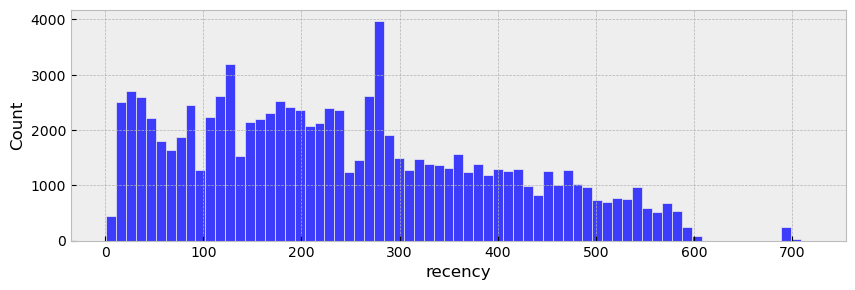

In [81]:
#распределение параметра "recency"
plt.figure(figsize=(10,3))
sns.histplot(RFM_final.recency)

<AxesSubplot:xlabel='frequency', ylabel='Count'>

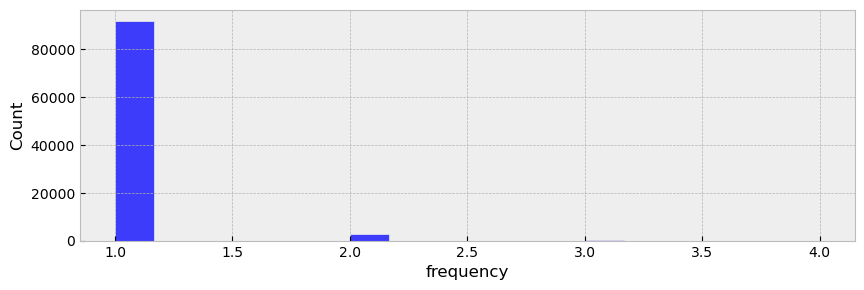

In [82]:
#распределение параметра "frequency", по значениям менее 5
plt.figure(figsize=(10,3))
sns.histplot(RFM_final.query("frequency < 5").frequency)

<AxesSubplot:xlabel='monetary', ylabel='Count'>

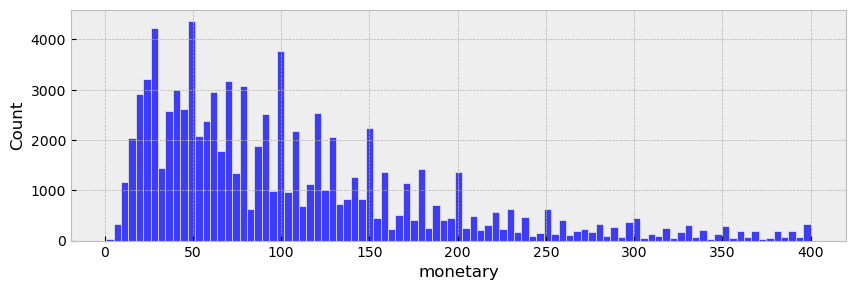

In [83]:
#распределение параметра "monetary", по значениям менее 400
plt.figure(figsize=(10,3))
sns.histplot(RFM_final.query("monetary < 400").monetary)

По результатам проверки установил следующее:

Распределение "recency" довольно равномерно (хотя нормальности нет). Логично будет разделить его равномерно на три части: по 33-му и 66-му квантилям.

"frequency" показывает, что подавляющее большинство покупателей совершали всего лишь одну покупку. Разделю на 4 подгруппы: 1 - покупатели, оформившие один заказ; 2 - покупатели с двумя покупками; 3 - совершившие 3/4 покупки; 4 - покупатели, сделавшие 5 и более покупок.

Распределение параметра "monetary" также ненормальное, большая часть значений слева. Большая часть покупок не превышает сумму 200. В данном случае, кажется оптимальным вариантом взять также 3 категории. Поделим группу слева (до 200) примерно пополам (до  и после 55 квантиля), а также возьмем всех остальных (с 83 квантиля). Итого получатся группы: покупатели до 55-го квантиля (сумма до ~ 100) , от 55 до 83-го (сумма ~ 100-200) и свыше 83-го квантиля (оставшиеся покупатели - свыше ~ 200).

In [104]:
#пишу функции для определения указанных выше сегментов в таблице
# r_score: чем выше оценка, тем более "давним" считается клиент
def r_score(x):
    if x <= quintiles['recency'][.33]:
        return 1
    elif x <= quintiles['recency'][.66]:
        return 2
    else:
        return 3
# f_score: чем выше оценка, тем больше заказов сделал клиент
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x ==3 or x == 4:
        return 3
    else:
        return 4  
# m_score: чем выше оценка, тем большую сумму клиент потратил
def m_score(x):
    if x <= quintiles['monetary'][0.55]:
        return 1
    elif x <= quintiles['monetary'][0.83]:
        return 2
    else:
        return 3

In [105]:
#применю функции, добавив в таблицу ранги покупателей, а также сделаю сводный ранг
RFM_final['R'] = RFM_final['recency'].apply(lambda x: r_score(x))
RFM_final['F'] = RFM_final['frequency'].apply(lambda x: f_score(x))
RFM_final['M'] = RFM_final['monetary'].apply(lambda x: m_score(x))
RFM_final['RFM Score'] = RFM_final['R'].map(str) + RFM_final['F'].map(str) + RFM_final['M'].map(str)
RFM_final.head(3)

,customers,recency,frequency,monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.9,1,1,2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.9,1,1,1,111
2,0000f46a3911fa3c0805444483337064,542,1,69.0,3,1,1,311


Делю покупателей на разные кластеры в зависимости от параметров "recency" и "frequency":

r=1, f=1 — 'newbe' (свежие покупатели, у которых 1 заказ и которые не спешат делать второй);

r=1, f=2 — 'developing' (покупали 2 раза, последняя активность была также недавно);

r=1, f=3 — 'loyal' (покупали много, последняя покупка не очень давно);

r=1, f=4 — 'VIP' (очень много покупок, последняя недавно);

r=2, f=1,2,3 or 4  — 'sleeping' (последняя покупка имеет среднюю давность, вне зависимости от общего количества покупок);

r=3, f=1 or 2 — 'lost' (последняя покупка сделана давно, покупок было немного);

r=3, f=3 or 4 — 'lost loyalists' (было много покупок, но последняя была сделана давно).

В числовых выражениях данных показателей это будет следующее деление:

Recency:    
1 — от 0 до 153 дней;    
2 — от 153 до 292 дней;  
3 — от 292 дней.

Frequency:    
1 — 1 заказ;    
2 — 2 заказа;    
3 — 3 или 4 заказа;    
4 — 5 и более заказов.    

Monetary:    
1 — от 0 до 100;    
2 — от 100 до 200;    
3 — свыше 200.    

In [113]:
#Графически это выглядит так:
img = 'rfm_distribution.png'
Image(url=img)

In [114]:
#создам словарь с такими же ключами и значениями, как узазаны выше
rf_map = {
    r'11': 'newbe',
    r'12': 'developing',
    r'13': 'loyal',
    r'14': 'VIP',
    r'2[1234]': 'sleeping',
    r'3[12]': 'lost',
    r'3[34]': 'lost loyalists'}

In [118]:
#cоздам новую колонку, по созданному выше словарю,
#что позволит зачислить каждого покупателя в отдельный кластер в зависимости от "frequency" и "recency",
#а также сразу проверю результат
RFM_final['cluster'] = RFM_final['R'].map(str) + RFM_final['F'].map(str)
RFM_final['cluster'] = RFM_final['cluster'].replace(rf_map, regex=True)
RFM_final.head(7)

,customers,recency,frequency,monetary,R,F,M,RFM Score,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,1,1,2,112,newbe
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,1,1,1,111,newbe
2,0000f46a3911fa3c0805444483337064,542,1,69.00,3,1,1,311,lost
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,3,1,1,311,lost
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,3,1,2,312,lost
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,154.00,1,1,2,112,newbe
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,27.99,1,1,1,111,newbe


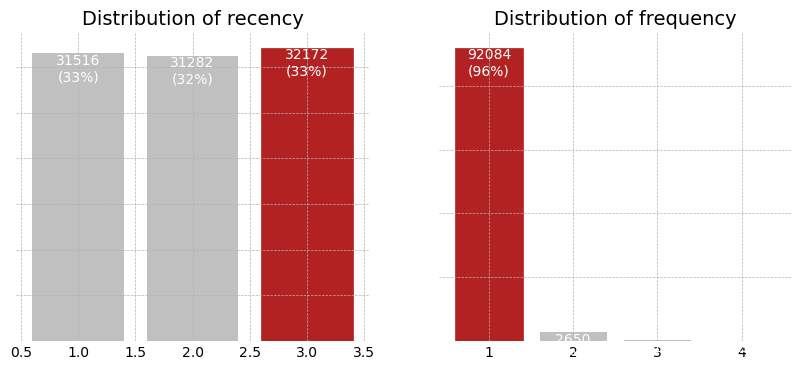

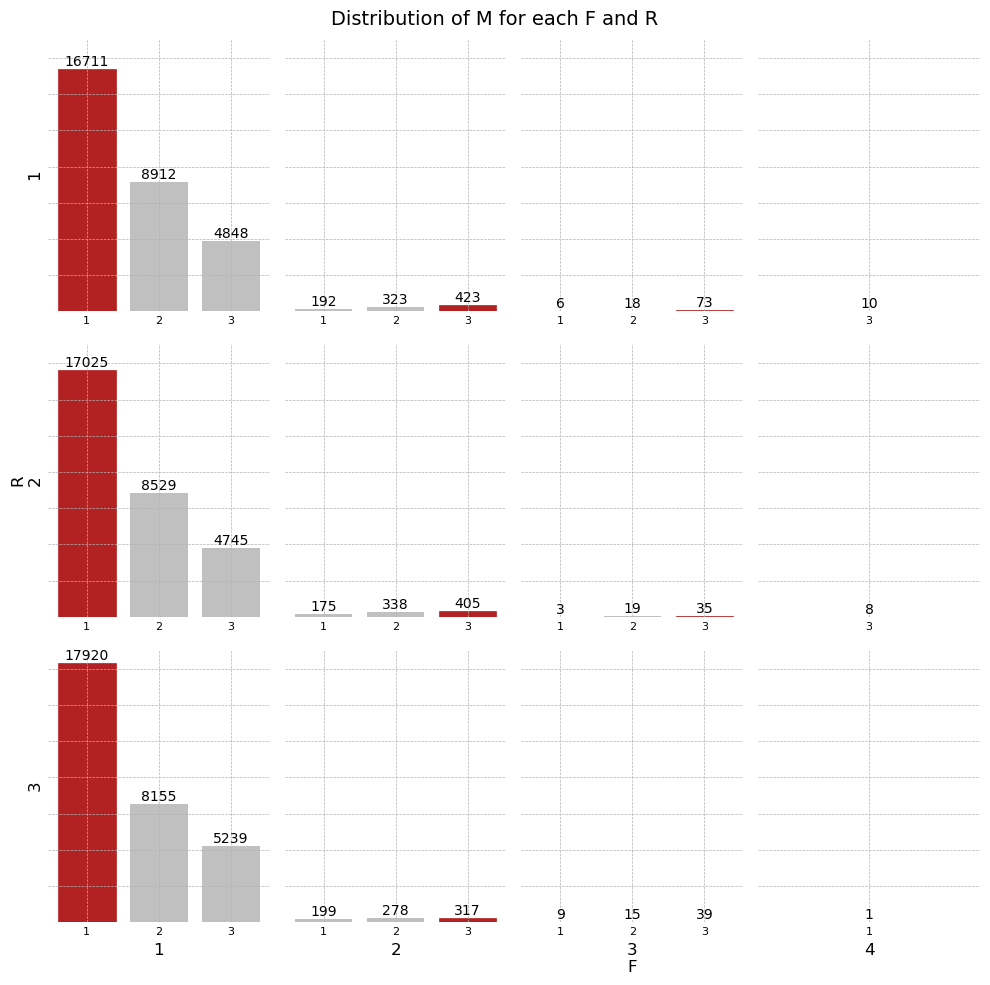

In [120]:
#строю распределение пользователей по значенияим "recency" и "frequency"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'recency', 'F':'frequency'}
    y = RFM_final[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
plt.show()

#теперь строю распределение параметра "monetary" по RF-значениям

fig, axes = plt.subplots(nrows=3, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 4)
f_range = range(1, 5)
for r in r_range:
    for f in f_range:
        y = RFM_final[(RFM_final['R'] == r) & (RFM_final['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 3:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 2:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Как было видно и на предыдущих графиках по распределению, "recency" имеет ровную форму, "frequency" же ясно показывает, что больше всего клиентов совершили только один заказ.

Также заметно, что для frequency 3/4 покупателей почти нет.

Покупатели для frequency 1/2 по разным по R  почти не отличаются.

Таким образом, можно сделать выводы:
1. что большинство клиентов покупали одну покупку (frequency 1);
2. сумма покупки в большинстве случаев не превышала 100 (monetary 1).

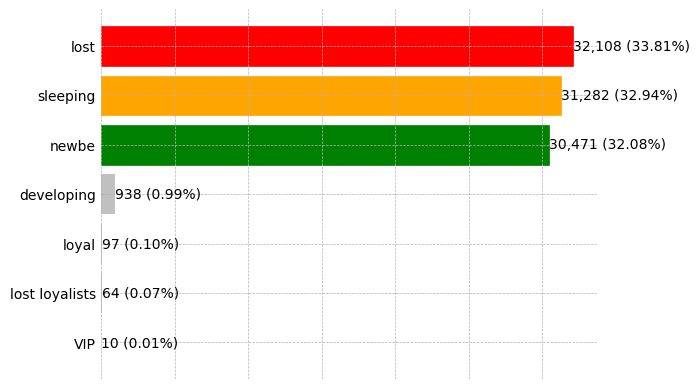

In [125]:
#теперь посчитаю покупателей для каждого кластера
cluster_counts = RFM_final['cluster'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(cluster_counts)),
              cluster_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(cluster_counts)))
ax.set_yticklabels(cluster_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if cluster_counts.index[i] == 'lost':
            bar.set_color('red')
        elif cluster_counts.index[i] == 'sleeping':
            bar.set_color('orange')
        elif cluster_counts.index[i] == 'newbe':
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:.2f}%)'.format(int(value),
                                   float(value*100/cluster_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

По итоговому графику видно, что большая часть (~ 34%) наших покупателей находится в категории "lost", т.е. мы их уже потеряли.

Вместе с тем, позитивным моментом является то, что кластеры покупателей "sleeping" и "newbe" совокупно (~ 33 и 30% соответственно) превышают категорию lost - еще не все потеряно. Т.к. указанные две категории, потенциальные покупатели, которых можно сохранить и переводить в лояльные к нам категории. Особенно это касается "newbe" - это те клиенты, которые пришли относительно недавно, но сделали всего лишь одну покупку.

Что касается покупателей в лояльных нам категориях, то, к сожалению, в настоящий момент их величина крайне незначительна (менее, чем 0.5%).


С учетом полученных в результате настоящего исследования данных, можно дать следующие рекомендации отделу продаж:

1. Около 8% от всех доставленных товаров были доставлены покупателям с нарушением сроков доставки. Такая значимая величина не может не повлиять на удержание наших клиентов. В первую очередь рекомендовано выяснить причины нарушения сроков доставки, т.к. в данном случае это основной риск оттока клиентов;

2. Во вторую очередь необходим комплекс мероприятий, направленных на удержание новых клиентов ("newbe") - проработать акции, скидки, бонусы на следующую покупку;

3. Аналогично необходимы мероприятия для спящих клиентов ("sleeping"), которые бы стимулировали их вернуться к нашим товарам в кратчайшие сроки;

4. Также, по всей вероятности, для категории потерянных клиентов ("lost"), указанные выше меры эффективными не будут, а за счет отказа в их реализации на данном кластере клиентов можно добиться оптимизации операционных расходов и расходов на маркетинг;

5. Наконец, в данных были обнаружены ошибки (нулевой вес товара, доставка неоплаченных товаров, отсутствие даты доставки доставленных товаров) - для целей более качественного последующего анализа нашей аудитории рекомендовано передать данные в соответствующее подразделение Компании на их уточнение.